In [ ]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc2
!pip install autokeras

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc2) to /tmp/pip-req-build-elt69p2l
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-elt69p2l
  Running command git checkout -q 8f0d4550417af1676143499c688434065eb807c9
  Using cached autokeras-1.0.16.post1-py3-none-any.whl (166 kB)
     |████████████████████████████████| 454.4 MB 21 kB/s 
     |████████████████████████████████| 97 kB 7.0 MB/s 
     |████████████████████████████████| 14.8 MB 44.8 MB/s 
     |████████████████████████████████| 1.2 MB 39.9 MB/s 
     |████████████████████████████████| 4.0 MB 42.3 MB/s 
     |████████████████████████████████| 462 kB 50.4 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68721 sha256=c79968f907c0b7057384b0936f40f33309d8db62769ccfffe0dc2373934c6ba5
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attem

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from autokeras import StructuredDataRegressor

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataframe=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/thesis/1920.csv',usecols=[2])

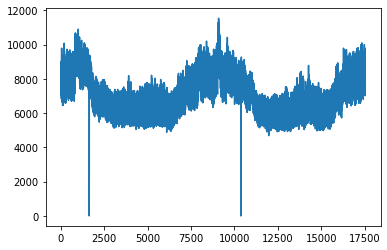

In [ ]:
plt.plot(dataframe)

In [ ]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
dataset = scaler.fit_transform(dataset)


In [ ]:
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)
    

seq_size = 72 

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)



print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))


Shape of training set: (11506, 72)
Shape of test set: (5893, 72)


In [ ]:
import autokeras as ak

In [ ]:
clf = ak.StructuredDataRegressor(max_trials = 100)
clf.fit(trainX,trainY, verbose=2, epochs=250)


Trial 9 Complete [00h 08m 06s]
val_loss: 0.0013737964909523726

Best val_loss So Far: 0.000912338902708143
Total elapsed time: 00h 23m 15s
INFO:tensorflow:Oracle triggered exit
Epoch 1/250
360/360 [==============================] - 3s 5ms/step - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 2/250
360/360 [==============================] - 2s 5ms/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 3/250
360/360 [==============================] - 2s 5ms/step - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 4/250
360/360 [==============================] - 2s 5ms/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 5/250
360/360 [==============================] - 2s 5ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 6/250
360/360 [==============================] - 2s 5ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 7/250
360/360 [==============================] - 2s 5ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 8/250
360/360 [=========================

In [ ]:
acc=clf.evaluate(testX, testY)
print(acc)

185/185 [==============================] - 1s 4ms/step - loss: 6.1427e-05 - mean_squared_error: 6.1427e-05
[6.142749771242961e-05, 6.142749771242961e-05]


In [ ]:
model=clf.export_model()

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 72)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 72)                0         
_________________________________________________________________
normalization (Normalization (None, 72)                145       
_________________________________________________________________
dense (Dense)                (None, 32)                2336      
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [ ]:
model.fit(trainX,trainY, verbose=2, epochs=250)


Epoch 1/250
360/360 - 2s - loss: 9.5675e-05 - mean_squared_error: 9.5675e-05
Epoch 2/250
360/360 - 1s - loss: 9.5614e-05 - mean_squared_error: 9.5614e-05
Epoch 3/250
360/360 - 1s - loss: 9.3196e-05 - mean_squared_error: 9.3196e-05
Epoch 4/250
360/360 - 1s - loss: 1.0684e-04 - mean_squared_error: 1.0684e-04
Epoch 5/250
360/360 - 1s - loss: 9.9321e-05 - mean_squared_error: 9.9321e-05
Epoch 6/250
360/360 - 1s - loss: 1.2123e-04 - mean_squared_error: 1.2123e-04
Epoch 7/250
360/360 - 1s - loss: 9.8677e-05 - mean_squared_error: 9.8677e-05
Epoch 8/250
360/360 - 1s - loss: 1.0793e-04 - mean_squared_error: 1.0793e-04
Epoch 9/250
360/360 - 1s - loss: 1.3615e-04 - mean_squared_error: 1.3615e-04
Epoch 10/250
360/360 - 1s - loss: 1.0482e-04 - mean_squared_error: 1.0482e-04
Epoch 11/250
360/360 - 1s - loss: 9.7288e-05 - mean_squared_error: 9.7288e-05
Epoch 12/250
360/360 - 1s - loss: 9.6033e-05 - mean_squared_error: 9.6033e-05
Epoch 13/250
360/360 - 1s - loss: 9.4120e-05 - mean_squared_error: 9.4120

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])


In [ ]:
import math

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 60.55 RMSE
Test Score: 57.30 RMSE


In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict


testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict


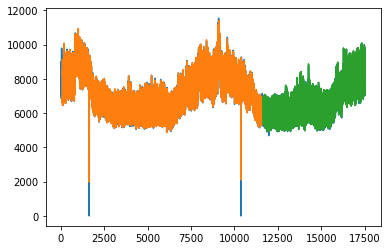

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()